In [ ]:
import pandas as pd

df1 = pd.read_excel("/content/sample_data/Online Retail.xlsx")

In [ ]:
df = df1

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


#Missing Value (Handling)

In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.shape

(541909, 8)

In [ ]:
df_clean = df.dropna(subset=['Description', 'CustomerID'])
df_clean = df_clean.drop('Description',axis=1)

In [ ]:
df_clean.shape

(406829, 7)

In [ ]:
df_clean.isna().sum()

,0
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


#Dropping Duplicates

In [ ]:
df_clean.drop_duplicates(inplace=True)

In [ ]:
df_clean.shape

(401602, 7)

In [ ]:
df_clean = df_clean[df_clean['Quantity'] >= 0]

In [ ]:
df_clean.shape

(392730, 7)

#Label Encoding String Columns

In [ ]:
df_clean['StockCode'] = df_clean['StockCode'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_clean['StockCode'] = label_encoder.fit_transform(df_clean['StockCode'])
df_clean['Country'] = label_encoder.fit_transform(df_clean['Country'])




In [ ]:
df_clean.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,3233,6,2010-12-01 08:26:00,2.55,17850.0,35
1,536365,2643,6,2010-12-01 08:26:00,3.39,17850.0,35
2,536365,2847,8,2010-12-01 08:26:00,2.75,17850.0,35
3,536365,2795,6,2010-12-01 08:26:00,3.39,17850.0,35
4,536365,2794,6,2010-12-01 08:26:00,3.39,17850.0,35


#Observing Outliers for Quantity and Unit Price through Box Plot

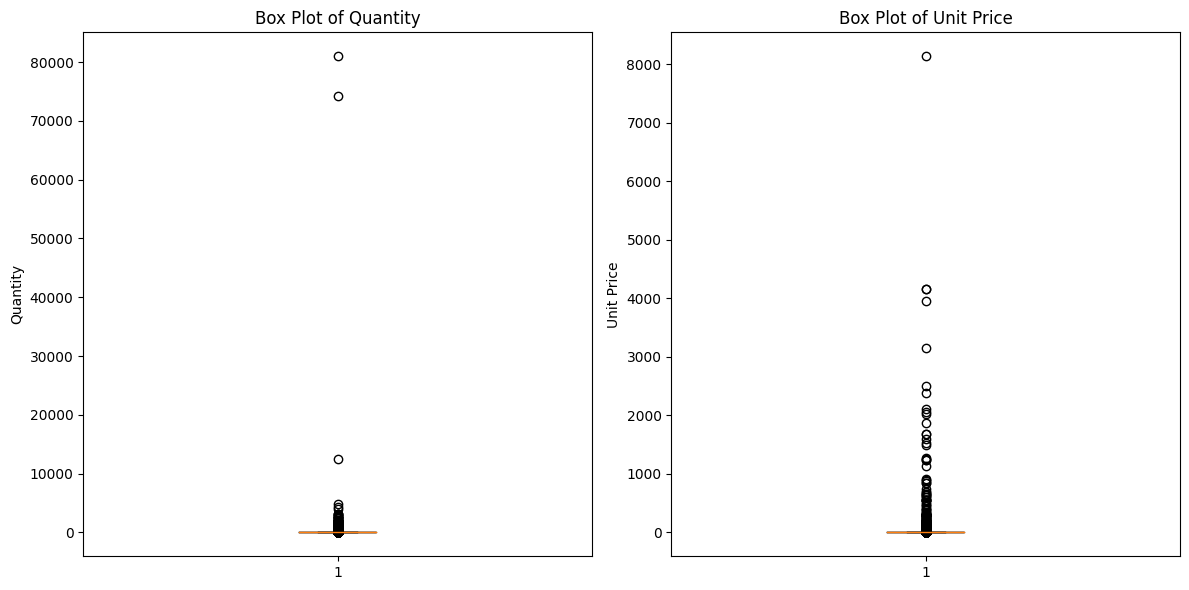

In [ ]:
import matplotlib.pyplot as plt

# Plotting box plot
plt.figure(figsize=(12, 6))

# Box plot for 'quantity'
plt.subplot(1, 2, 1)
plt.boxplot(df_clean['Quantity'])
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')

# Box plot for 'unitprice'
plt.subplot(1, 2, 2)
plt.boxplot(df_clean['UnitPrice'])
plt.title('Box Plot of Unit Price')
plt.ylabel('Unit Price')

plt.tight_layout()
plt.show()



#Handling Outliers

In [ ]:
q1 = df_clean['Quantity'].quantile(0.25)
q3 = df_clean['Quantity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_clean.loc[(df_clean['Quantity'] < lower_bound),'Quantity'] = lower_bound
df_clean.loc[(df_clean['Quantity'] > upper_bound),'Quantity'] = upper_bound




In [ ]:
q1 = df_clean['UnitPrice'].quantile(0.25)
q3 = df_clean['UnitPrice'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_clean.loc[(df_clean['UnitPrice'] < lower_bound),'UnitPrice'] = lower_bound
df_clean.loc[(df_clean['UnitPrice'] > upper_bound),'UnitPrice'] = upper_bound

##Create New Feature

In [ ]:
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [ ]:
q1 = df_clean['TotalPrice'].quantile(0.25)
q3 = df_clean['TotalPrice'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_clean.loc[(df_clean['TotalPrice'] < lower_bound),'TotalPrice'] = lower_bound
df_clean.loc[(df_clean['TotalPrice'] > upper_bound),'TotalPrice'] = upper_bound


In [ ]:
df_clean.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,3233,6,2010-12-01 08:26:00,2.55,17850.0,35,15.30
1,536365,2643,6,2010-12-01 08:26:00,3.39,17850.0,35,20.34
2,536365,2847,8,2010-12-01 08:26:00,2.75,17850.0,35,22.00
3,536365,2795,6,2010-12-01 08:26:00,3.39,17850.0,35,20.34
4,536365,2794,6,2010-12-01 08:26:00,3.39,17850.0,35,20.34


#Extract Numerical Features from InvoiceDate:
Convert the InvoiceDate column into multiple numerical features.


In [ ]:
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Day'] = df_clean['InvoiceDate'].dt.day
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

#Normalizing Data

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['Quantity', 'UnitPrice','TotalPrice','Day','Month','Year','Hour']
scaler = StandardScaler()
df_clean[numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])


In [ ]:
df_clean.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour
0,536365,3233,-0.295139,2010-12-01 08:26:00,-0.024660,17850.0,35,0.199860,-3.78119,1.28786,-1.623179,-2.07389
1,536365,2643,-0.295139,2010-12-01 08:26:00,0.374157,17850.0,35,0.689474,-3.78119,1.28786,-1.623179,-2.07389
2,536365,2847,-0.048512,2010-12-01 08:26:00,0.070296,17850.0,35,0.850735,-3.78119,1.28786,-1.623179,-2.07389
3,536365,2795,-0.295139,2010-12-01 08:26:00,0.374157,17850.0,35,0.689474,-3.78119,1.28786,-1.623179,-2.07389
4,536365,2794,-0.295139,2010-12-01 08:26:00,0.374157,17850.0,35,0.689474,-3.78119,1.28786,-1.623179,-2.07389


In [ ]:
df_clean = df_clean.drop('InvoiceDate',axis=1)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392730 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   InvoiceNo   392730 non-null  object 
 1   StockCode   392730 non-null  int64  
 2   Quantity    392730 non-null  float64
 3   UnitPrice   392730 non-null  float64
 4   CustomerID  392730 non-null  float64
 5   Country     392730 non-null  int64  
 6   TotalPrice  392730 non-null  float64
 7   Year        392730 non-null  float64
 8   Month       392730 non-null  float64
 9   Day         392730 non-null  float64
 10  Hour        392730 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 36.0+ MB


#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test = train_test_split(df_clean,test_size=0.3,random_state=7)

In [ ]:
X_train.shape ,X_test.shape

((274911, 11), (117819, 11))

#Calculate the within-cluster sum of squares (WCSS) for different values of k.

In [ ]:
from sklearn.cluster import KMeans
inertia_values = []
for k in range(2,11):
    mykmeans = KMeans(k,random_state=7)
    mykmeans.fit(X_train)
    inertia_values.append(mykmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:
inertia_values

[12273130755926.133,
 6141280069840.084,
 3922982309229.452,
 2867187193966.1396,
 2288996067224.085,
 1959412561364.6104,
 1726549715104.6838,
 1579341722306.2427,
 1466910205982.5662]

#Plot the WCSS against the number of clusters and look for the "elbow point"


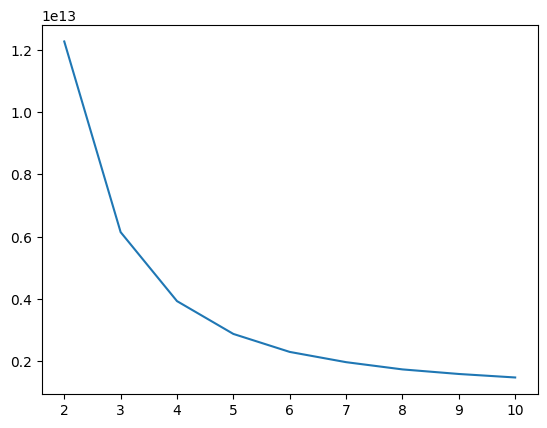

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(2,11)), inertia_values)

#Initialize the KMeans class with the optimal number of clusters.


In [ ]:
from sklearn.cluster import KMeans

mykmeans = KMeans(4,random_state=7)
mykmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=7)

In [ ]:
cluster_nos = mykmeans.predict(X_test)

#Predict the cluster labels for each data point.


In [ ]:
cluster_nos

array([3, 3, 0, ..., 2, 3, 3], dtype=int32)

In [ ]:
cluster_nos.shape, X_test.shape

((117819,), (117819, 11))

#Plot the clusters to visualize how the data points are grouped.

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions of the training and test data to 2D.
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


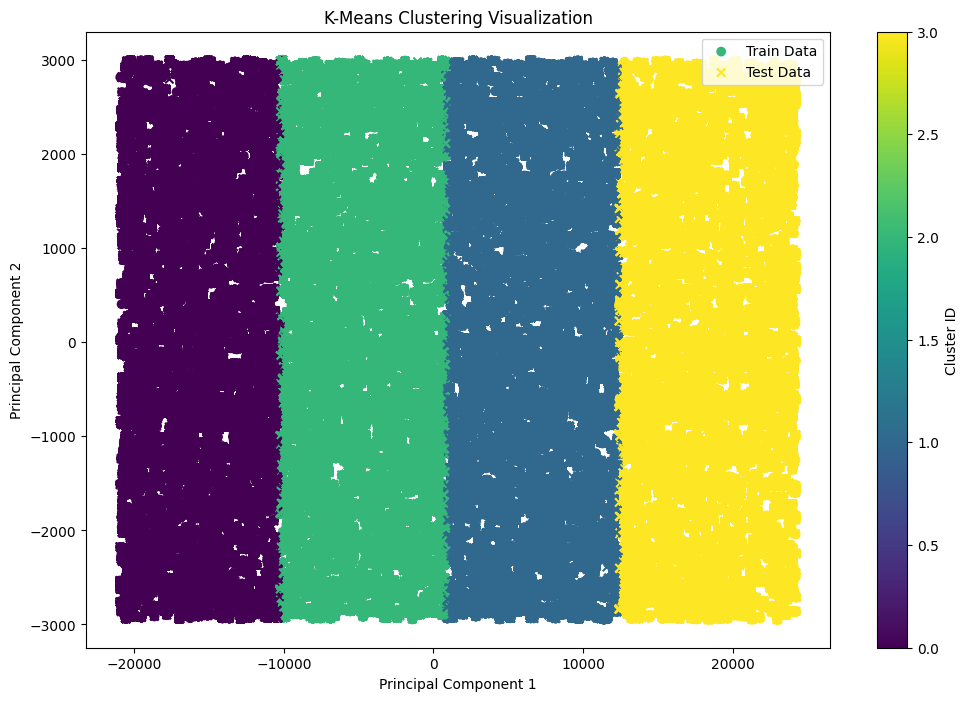

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot for the training data
plt.figure(figsize=(12, 8))

# Plot training data points with cluster labels
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=mykmeans.labels_, cmap='viridis', marker='o', label='Train Data')

# Plot test data points with predicted cluster labels
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=cluster_nos, cmap='viridis', marker='x', label='Test Data')

# Add titles and labels
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Cluster ID')
plt.show()



In [ ]:
from sklearn.cluster import KMeans

# Step 1: Predict the cluster labels for the entire dataset
cluster_labels = mykmeans.predict(df_clean)

# Step 2: Add the cluster labels as a new column to the original DataFrame
df_clean['ClusterLabel'] = cluster_labels

# Display the updated DataFrame with cluster labels
print(df_clean.head())


  InvoiceNo  StockCode  Quantity  UnitPrice  CustomerID  Country  TotalPrice  \
0    536365       3233 -0.295139  -0.024660     17850.0       35    0.199860   
1    536365       2643 -0.295139   0.374157     17850.0       35    0.689474   
2    536365       2847 -0.048512   0.070296     17850.0       35    0.850735   
3    536365       2795 -0.295139   0.374157     17850.0       35    0.689474   
4    536365       2794 -0.295139   0.374157     17850.0       35    0.689474   

      Year    Month       Day     Hour  ClusterLabel  
0 -3.78119  1.28786 -1.623179 -2.07389             3  
1 -3.78119  1.28786 -1.623179 -2.07389             3  
2 -3.78119  1.28786 -1.623179 -2.07389             3  
3 -3.78119  1.28786 -1.623179 -2.07389             3  
4 -3.78119  1.28786 -1.623179 -2.07389             3  


#Mean, median, and standard deviation of features within each cluster.

In [ ]:

# Step 1: Calculate summary statistics for each cluster
cluster_summary = df_clean.groupby('ClusterLabel').agg({
    'Quantity': ['mean', 'median', 'std'],
    'UnitPrice': ['mean', 'median', 'std'],
    'TotalPrice': ['mean', 'median', 'std'],
})

# Step 2: Print the cluster summary
print(cluster_summary)

# Mean Values:

# Cluster 1 and Cluster 2 have positive means for Quantity, UnitPrice, and TotalPrice, indicating higher average values compared to Cluster 0 and Cluster 3.
# Cluster 0 and Cluster 3 have negative means, suggesting lower average values.

# Median Values:

# Cluster 1 has a positive median for UnitPrice and TotalPrice, which is higher than other clusters.
# Clusters 0, 2, and 3 have negative or zero medians, showing lower typical values for these features.

# Standard Deviation (Std):

# Cluster 0 has the highest standard deviation for Quantity, UnitPrice, and TotalPrice, indicating the highest variability.
# Cluster 2 has the lowest standard deviation for TotalPrice, suggesting less variability compared to others.

# Summary:
# Clusters with higher mean values (e.g., Cluster 1) might represent segments with higher average spending.
# Clusters with higher standard deviation (e.g., Cluster 0) indicate more variability in purchasing behavior.
# Clusters with negative or lower median values might show lower typical purchasing behavior.


              Quantity                     UnitPrice                      \
                  mean    median       std      mean    median       std   
ClusterLabel                                                               
0            -0.084606 -0.541765  0.973285 -0.046712 -0.432973  0.969075   
1             0.024749 -0.295139  0.998314  0.031402 -0.309530  1.034107   
2             0.082827 -0.295139  1.023543 -0.027440 -0.432973  0.985317   
3            -0.015932 -0.295139  0.997743  0.057224 -0.309530  1.015841   

             TotalPrice                      
                   mean    median       std  
ClusterLabel                                 
0             -0.111710 -0.365528  1.000667  
1              0.042471 -0.074091  0.988108  
2              0.060501 -0.072148  0.999197  
3              0.025030 -0.159579  1.000751  


#Bar Plot (Numbers of Customer By Country)

In [ ]:
# Group by 'Country' and count occurrences
country_counts = df.groupby('Country').size().reset_index(name='Count')

# Sort by 'Count' in descending order
country_counts_sorted = country_counts.sort_values(by='Count', ascending=True)

# Display the sorted DataFrame
print(country_counts_sorted)


                 Country   Count
29          Saudi Arabia      10
2                Bahrain      19
8         Czech Republic      30
4                 Brazil      32
22             Lithuania      35
21               Lebanon      45
28                   RSA      58
11    European Community      61
35  United Arab Emirates      68
23                 Malta     127
15                Greece     146
5                 Canada     151
17               Iceland     182
30             Singapore     229
16             Hong Kong     288
34                   USA     291
18                Israel     297
26                Poland     341
20                 Japan     358
9                Denmark     389
1                Austria     401
37           Unspecified     446
32                Sweden     462
7                 Cyprus     622
12               Finland     695
6        Channel Islands     758
19                 Italy     803
25                Norway    1086
0              Australia    1259
27        

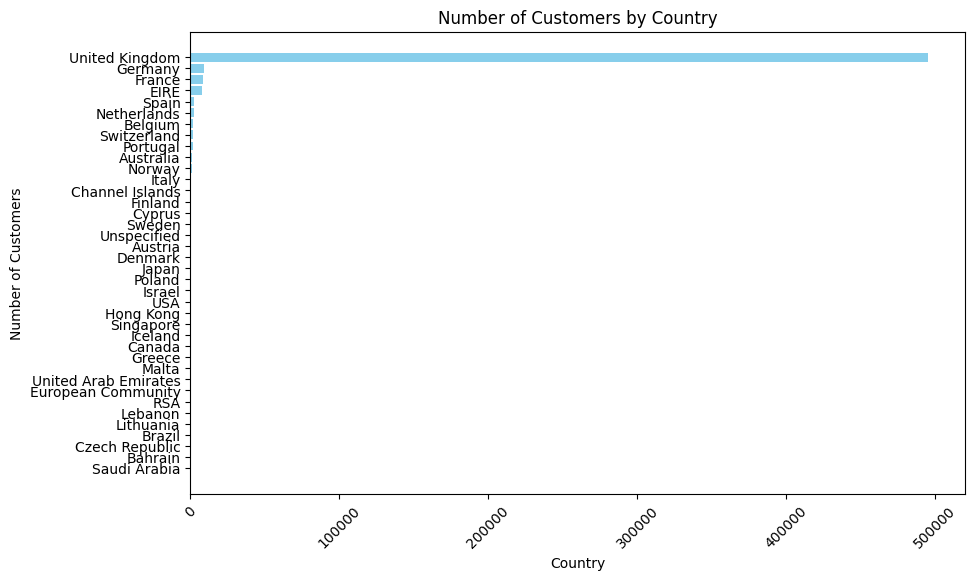

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(country_counts_sorted['Country'], country_counts_sorted['Count'], color='skyblue')

# Add titles and labels
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

#Number of Transactions per month of year 2011


<ipython-input-76-70e4edcc6a41>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['Month'] = df_2011['InvoiceDate'].dt.month


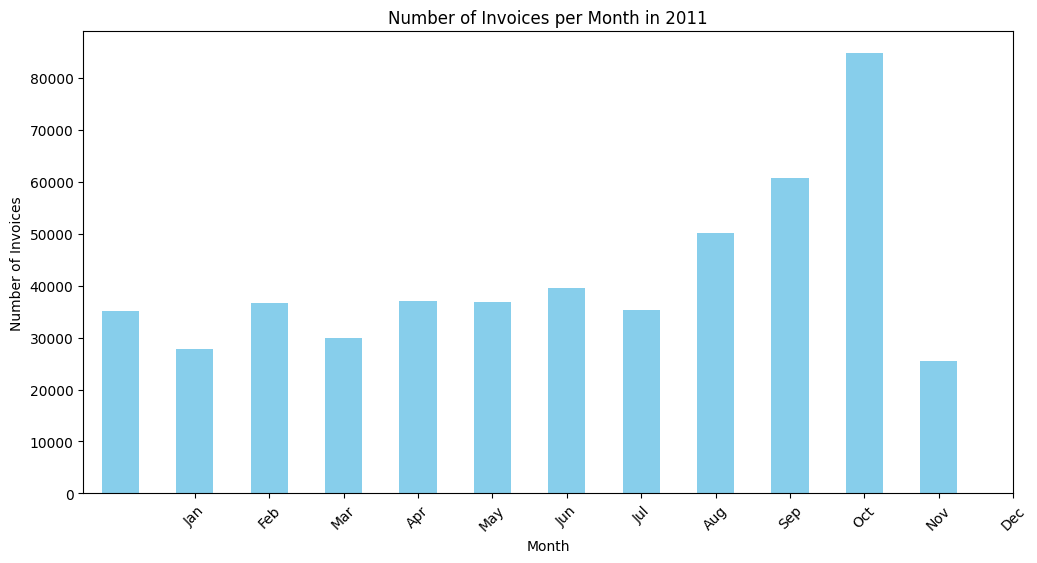

In [ ]:
# Filter data for the year 2010
df_2011 = df[df['InvoiceDate'].dt.year == 2011]

# Extract month from InvoiceDate
df_2011['Month'] = df_2011['InvoiceDate'].dt.month

# Count the number of transactions per month
transactions_per_month = df_2011['Month'].value_counts().sort_index()

# Plot the number of transactions per month
plt.figure(figsize=(12, 6))
transactions_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Invoices per Month in 2011')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# transactions_per_month = df_clean.groupby('Month').size().reset_index(name='Number of Transactions')
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.bar(transactions_per_month['Month'], transactions_per_month['Number of Transactions'], color='b')

# # Add titles and labels
# plt.title('Number of Invoices per Month for the Year 2010')
# plt.xlabel('Month')
# plt.ylabel('Number of Invoices')

# # Add x-ticks labels for months
# plt.xticks(transactions_per_month['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# # Display the plot
# plt.show()

#Number of Transaction per day in 2011

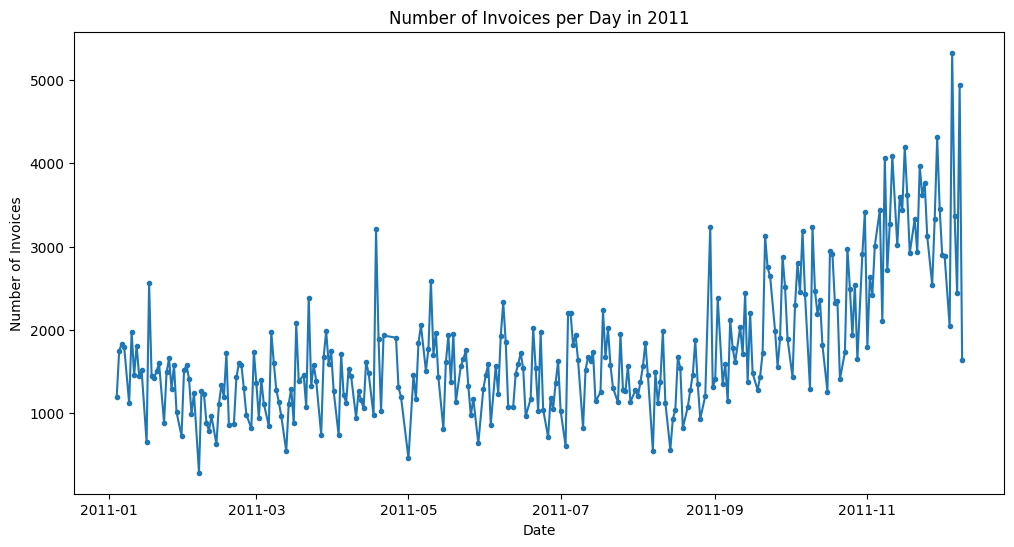

In [ ]:
df_2011 = df[df['InvoiceDate'].dt.year == 2011]

# Group by day and count the number of invoices
invoices_per_day = df_2011.groupby(df_2011['InvoiceDate'].dt.date)['InvoiceNo'].count()

# Plot the number of invoices per day
plt.figure(figsize=(12, 6))
invoices_per_day.plot(kind='line', marker='.')
plt.title('Number of Invoices per Day in 2011')
plt.xlabel('Date')
plt.ylabel('Number of Invoices')
plt.show()

#Plot the Numner of Invoices per Day of the week

<ipython-input-78-2f65b5fb901a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['DayOfWeek'] = df_2011['InvoiceDate'].dt.day_name()


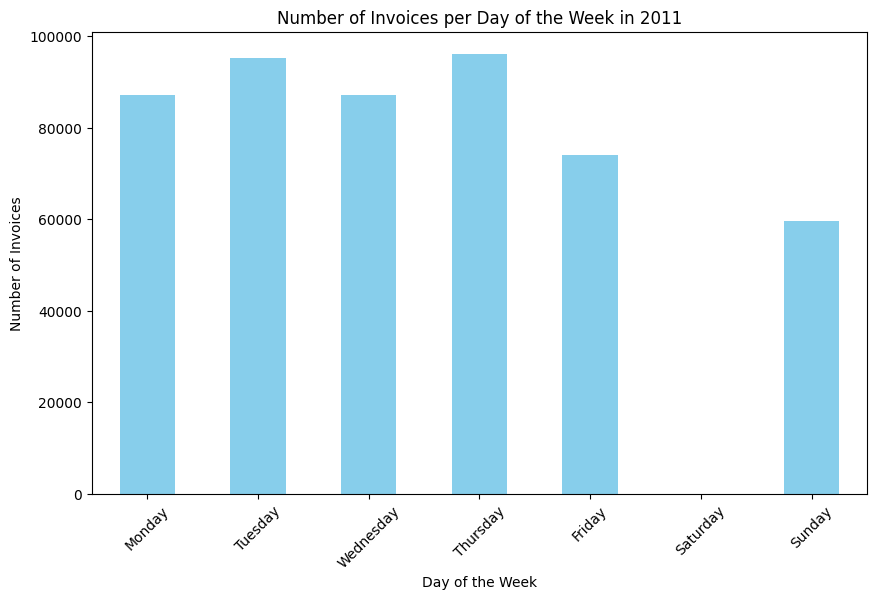

In [ ]:
df_2011 = df[df['InvoiceDate'].dt.year == 2011]

# Extract the day of the week from the 'InvoiceDate'
df_2011['DayOfWeek'] = df_2011['InvoiceDate'].dt.day_name()

# Group by the day of the week and count the number of invoices
invoices_per_day_of_week = df_2011.groupby('DayOfWeek')['InvoiceNo'].count()

# Reorder days of the week to start with Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
invoices_per_day_of_week = invoices_per_day_of_week.reindex(ordered_days)

# Plot the number of invoices per day of the week as a bar chart
plt.figure(figsize=(10, 6))
invoices_per_day_of_week.plot(kind='bar', color='skyblue')
plt.title('Number of Invoices per Day of the Week in 2011')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# RFM :

# RECENCY - how recent did a customer bought something
# FREQUENCY - how often does a customer buy something
# MONETARY VALUE - what is the value of the purchased items

In [ ]:
import pandas as pd

# Example DataFrame creation (replace this with your actual DataFrame)
# df = pd.DataFrame({'InvoiceDate': ['2024-01-01', '2024-01-02', '2024-01-03']})

# Convert the column to datetime format if it’s not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Find the latest date in the 'InvoiceDate' column
latest_date = df['InvoiceDate'].max()

# Format the latest date
latest_date_formatted = latest_date.strftime('%m-%d-%Y')

print(latest_date_formatted)



12-09-2011


#Calculate Recency (how recent did a customer bought something)

In [ ]:
import pandas as pd

# Example DataFrame creation (replace this with your actual DataFrame)
# df_clean = pd.DataFrame({'Date': ['12-01-2010', '01-15-2011', '09-30-2011']})

# Convert 'Date' column to datetime format
df['InvoiceDate']  = pd.to_datetime(df['InvoiceDate'], format='%m-%d-%Y')

# Define the fixed date for recency calculation
fixed_date = pd.to_datetime('12-09-2011', format='%m-%d-%Y')

# Calculate recency as the difference in days between the fixed date and the dates in the DataFrame
df_clean['Recency'] = (fixed_date - df['InvoiceDate']).dt.days

# Display the DataFrame to verify
print(df_clean.head())


  InvoiceNo  StockCode  Quantity  UnitPrice  CustomerID  Country  TotalPrice  \
0    536365       3233 -0.295139  -0.024660     17850.0       35    0.199860   
1    536365       2643 -0.295139   0.374157     17850.0       35    0.689474   
2    536365       2847 -0.048512   0.070296     17850.0       35    0.850735   
3    536365       2795 -0.295139   0.374157     17850.0       35    0.689474   
4    536365       2794 -0.295139   0.374157     17850.0       35    0.689474   

      Year    Month       Day     Hour  ClusterLabel  Recency  
0 -3.78119  1.28786 -1.623179 -2.07389             3      372  
1 -3.78119  1.28786 -1.623179 -2.07389             3      372  
2 -3.78119  1.28786 -1.623179 -2.07389             3      372  
3 -3.78119  1.28786 -1.623179 -2.07389             3      372  
4 -3.78119  1.28786 -1.623179 -2.07389             3      372  


##Calculate Frequency of purchase made by each customer.


In [ ]:
# Calculate frequency of purchases by each customer
df_frequency = df.groupby('CustomerID').size().reset_index(name='Frequency')

# Merge the frequency DataFrame with the original DataFrame
df_clean = df_clean.merge(df_frequency, on='CustomerID', how='left')

# Display the DataFrame to verify
print(df_clean.head())

  InvoiceNo  StockCode  Quantity  UnitPrice  CustomerID  Country  TotalPrice  \
0    536365       3233 -0.295139  -0.024660     17850.0       35    0.199860   
1    536365       2643 -0.295139   0.374157     17850.0       35    0.689474   
2    536365       2847 -0.048512   0.070296     17850.0       35    0.850735   
3    536365       2795 -0.295139   0.374157     17850.0       35    0.689474   
4    536365       2794 -0.295139   0.374157     17850.0       35    0.689474   

      Year    Month       Day     Hour  ClusterLabel  Recency  Frequency  
0 -3.78119  1.28786 -1.623179 -2.07389             3      372        312  
1 -3.78119  1.28786 -1.623179 -2.07389             3      372        312  
2 -3.78119  1.28786 -1.623179 -2.07389             3      372        312  
3 -3.78119  1.28786 -1.623179 -2.07389             3      372        312  
4 -3.78119  1.28786 -1.623179 -2.07389             3      372        312  


#Calculating Monetary value of Customers

In [ ]:
# Convert 'TotalPrice' column to float
df_clean['TotalPrice'] = df_clean['TotalPrice'].astype(float)

# Calculate total monetary value for each customer
df_monetary = df_clean.groupby('CustomerID').agg(MonetaryValue=('TotalPrice', 'sum')).reset_index()

# Round the monetary value to 2 decimal places
df_monetary['MonetaryValue'] = df_monetary['MonetaryValue'].round(2)

# Merge the monetary values back into the original DataFrame
df_clean = df_clean.merge(df_monetary, on='CustomerID', how='left')

# Display the DataFrame to verify
print(df_clean.head())

  InvoiceNo  StockCode  Quantity  UnitPrice  CustomerID  Country  TotalPrice  \
0    536365       3233 -0.295139  -0.024660     17850.0       35    0.199860   
1    536365       2643 -0.295139   0.374157     17850.0       35    0.689474   
2    536365       2847 -0.048512   0.070296     17850.0       35    0.850735   
3    536365       2795 -0.295139   0.374157     17850.0       35    0.689474   
4    536365       2794 -0.295139   0.374157     17850.0       35    0.689474   

      Year    Month       Day     Hour  ClusterLabel  Recency  Frequency  \
0 -3.78119  1.28786 -1.623179 -2.07389             3      372        312   
1 -3.78119  1.28786 -1.623179 -2.07389             3      372        312   
2 -3.78119  1.28786 -1.623179 -2.07389             3      372        312   
3 -3.78119  1.28786 -1.623179 -2.07389             3      372        312   
4 -3.78119  1.28786 -1.623179 -2.07389             3      372        312   

   MonetaryValue  
0          91.51  
1          91.51  
2    

#Customer with RFM

In [ ]:
# Extract just the date part from 'InvoiceDate'
#df['Date'] = df['InvoiceDate'].dt.date

# Create new DataFrame with the selected columns including the extracted date
df_rfm = df_clean[['CustomerID', 'Recency', 'Frequency', 'MonetaryValue', 'Day']]

# Display the resulting DataFrame
print(df_rfm)

NameError: name 'df_clean' is not defined

#RFM Segmentation Bar Chart of Number of Customers by Segment

<ipython-input-84-dd7405410f85>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['Segment'] = df_rfm.apply(categorize_customer, axis=1)
<ipython-input-84-dd7405410f85>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rfm_segments.index, y=rfm_segments.values, palette='Set2')


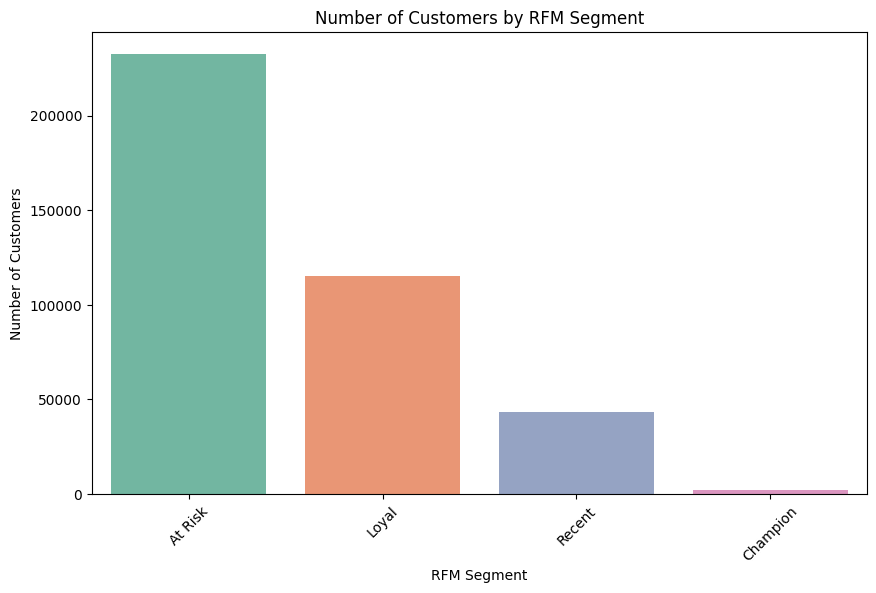

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example function to categorize customers based on their RFM scores
def categorize_customer(row):
    if row['Recency'] <= 30 and row['Frequency'] >= 10 and row['MonetaryValue'] >= 1000:
        return 'Champion'
    elif row['Recency'] <= 60 and row['Frequency'] >= 5:
        return 'Loyal'
    elif row['Recency'] <= 90:
        return 'Recent'
    else:
        return 'At Risk'

# Apply the function to create a new 'Segment' column
df_rfm['Segment'] = df_rfm.apply(categorize_customer, axis=1)


# Example: RFM Segmentation Bar Chart
# Example: Bar Chart of Number of Customers by Segment
plt.figure(figsize=(10, 6))
rfm_segments = df_rfm['Segment'].value_counts()
sns.barplot(x=rfm_segments.index, y=rfm_segments.values, palette='Set2')
plt.title('Number of Customers by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


#Visualize the Top 5 Customer

In [ ]:
# Calculate the RFM Score (if not already calculated)
df_rfm['Score'] = (df_rfm['Recency'] * 0.2 +
                   df_rfm['Frequency'] * 0.3 +
                   df_rfm['MonetaryValue'] * 0.5)

# Sort by the Score in descending order
top_5_customers = df_rfm.sort_values(by='Score', ascending=False).groupby('CustomerID').first().nlargest(5, 'Score')

# Display the top 5 customers
print("Top 5 customers:")
print(top_5_customers)

Top 5 customers:
            Recency  Frequency  MonetaryValue       Day  Segment     Score
CustomerID                                                                
14911.0         372       5903        2606.49 -1.623179  At Risk  3148.545
14646.0         353       2085        2847.18  0.572704  At Risk  2119.690
13089.0         368       1857        1575.49 -1.160888  At Risk  1418.445
14298.0         359       1640        1137.67 -0.120733  At Risk  1132.635
14156.0         370       1420        1162.63 -1.392034  At Risk  1081.315


<ipython-input-85-e87c766b65ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['Score'] = (df_rfm['Recency'] * 0.2 +


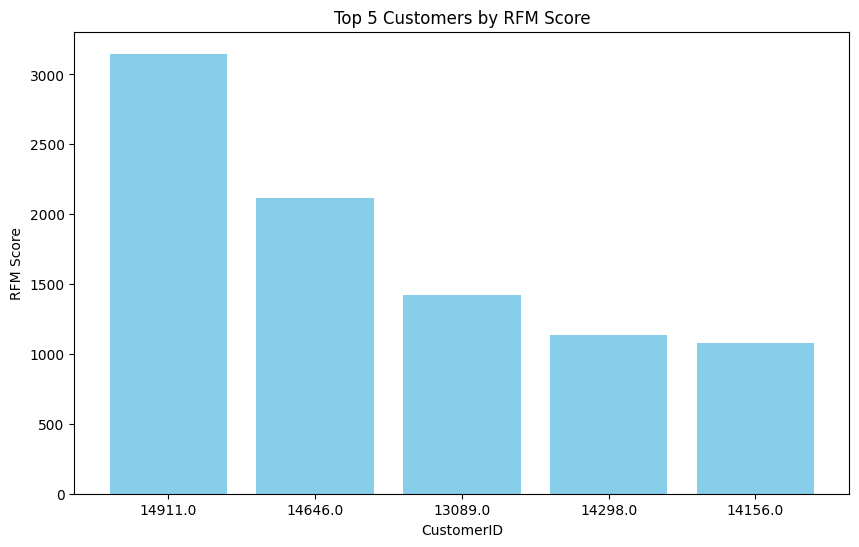

In [ ]:
import matplotlib.pyplot as plt

# Plot the top 5 customers
plt.figure(figsize=(10, 6))
plt.bar(top_5_customers.index.astype(str), top_5_customers['Score'], color='skyblue')
plt.title('Top 5 Customers by RFM Score')
plt.xlabel('CustomerID')
plt.ylabel('RFM Score')
plt.show()


#Top customers based on RFM score

In [ ]:
# Sort by RFM score in descending order
df_rfm_sorted = df_rfm.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the top customers based on RFM score
print("Top customers based on RFM score:")
print(df_rfm_sorted)

Top customers based on RFM score:
        CustomerID  Recency  Frequency  MonetaryValue       Day  Segment  \
0          14911.0      372       5903        2606.49 -1.623179  At Risk   
1          14911.0      372       5903        2606.49 -1.623179  At Risk   
2          14911.0      372       5903        2606.49 -1.623179  At Risk   
3          14911.0      372       5903        2606.49 -1.623179  At Risk   
4          14911.0      372       5903        2606.49 -1.623179  At Risk   
...            ...      ...        ...            ...       ...      ...   
392725     17841.0        0       7983       -6413.55 -0.814170    Loyal   
392726     17841.0        0       7983       -6413.55 -0.814170    Loyal   
392727     17841.0        0       7983       -6413.55 -0.814170    Loyal   
392728     17841.0        0       7983       -6413.55 -0.814170    Loyal   
392729     17841.0        0       7983       -6413.55 -0.814170    Loyal   

           Score  
0       3148.545  
1       3148.54